<a href="https://colab.research.google.com/github/Ayana-Man-oj/codealpha/blob/main/networkintrusion/networkintrusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scapy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.6 MB/s eta 0:00:00


Starting Network Intrusion Detection System...
[ALERT] Port Scan detected from 172.28.0.12
[ALERT] IP BLOCKED (Simulated): 172.28.0.12


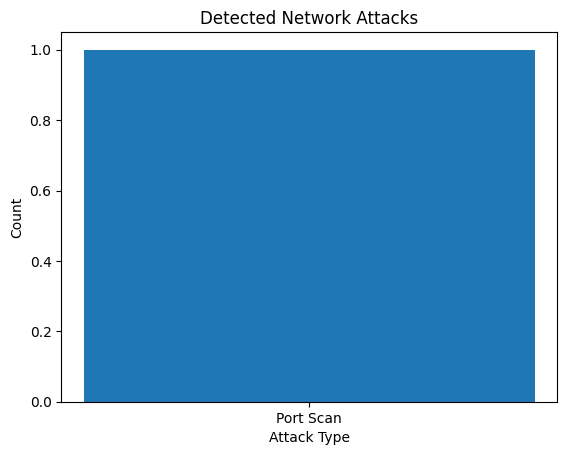

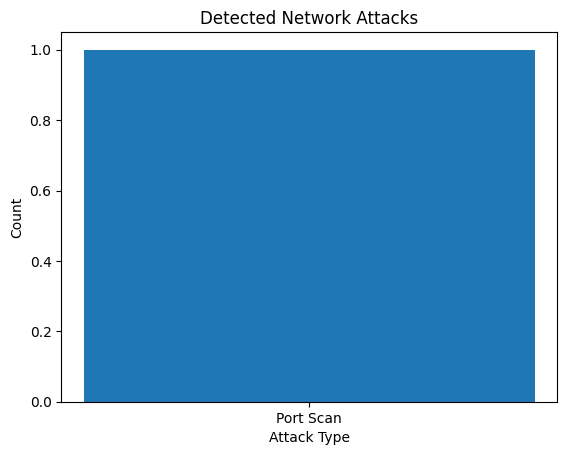

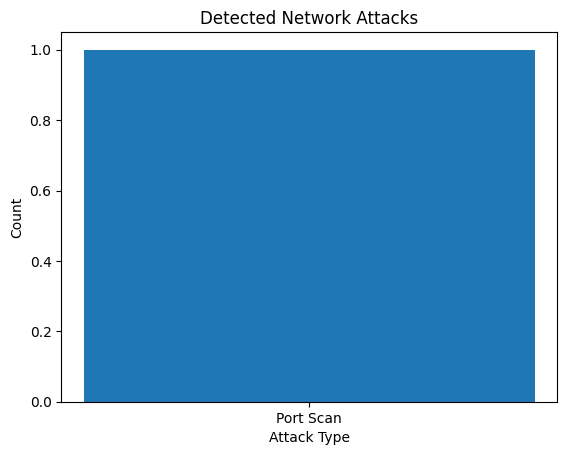

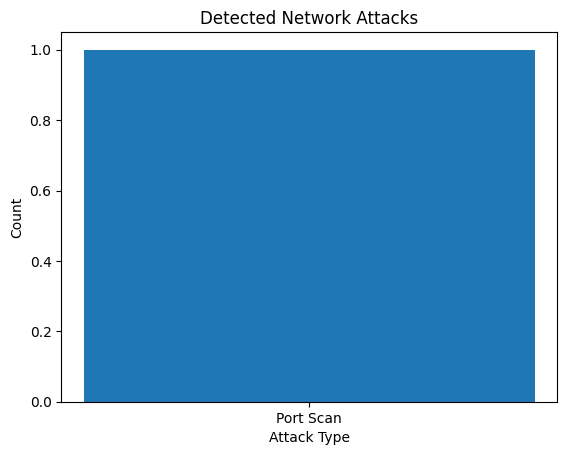

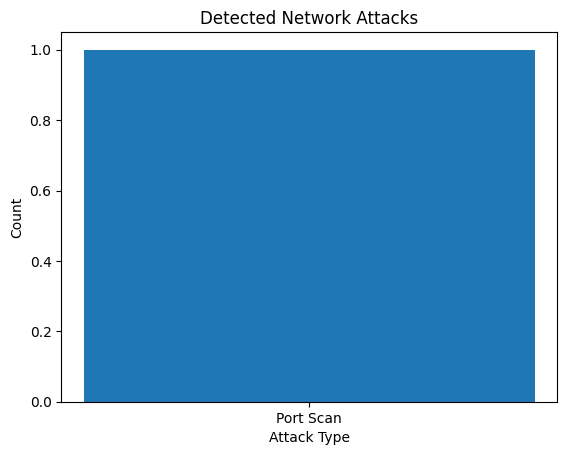

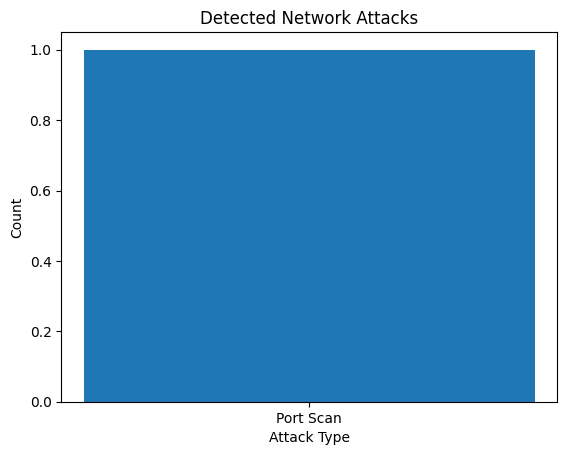

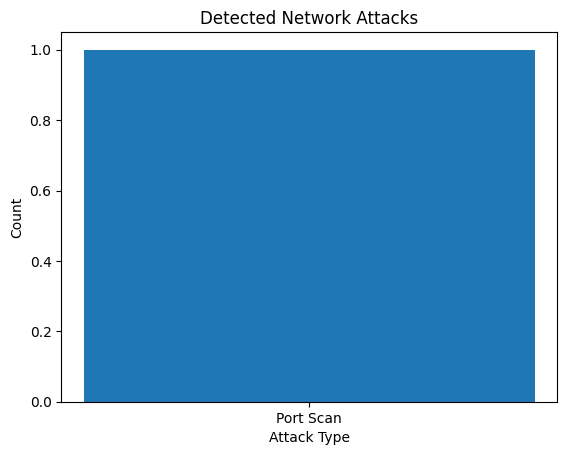

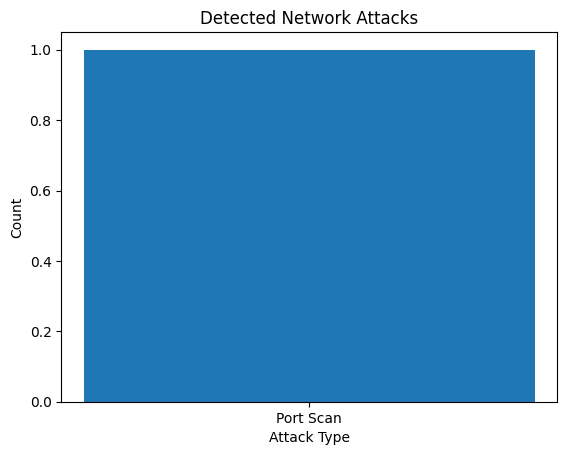

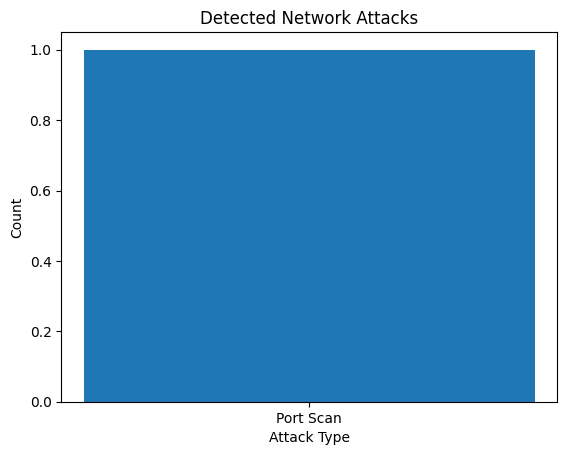

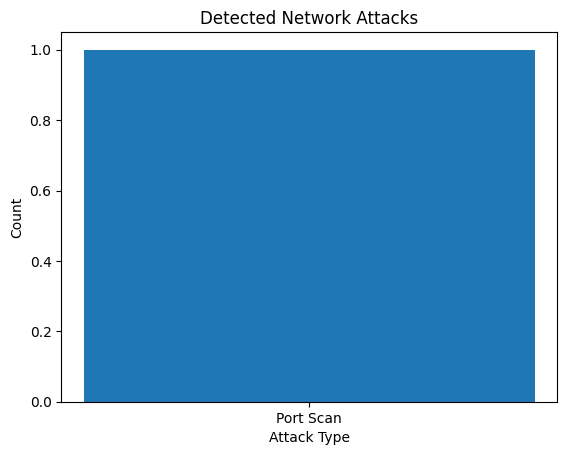

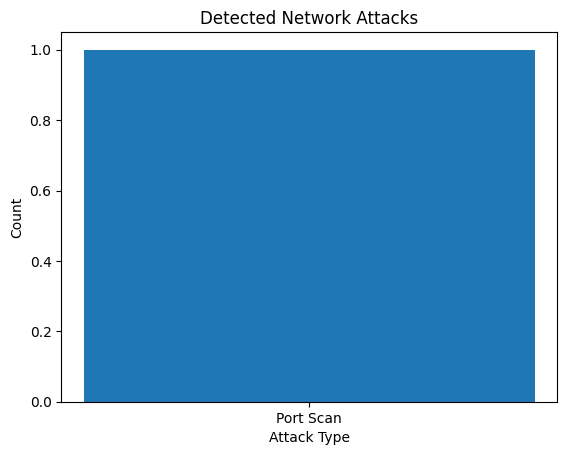

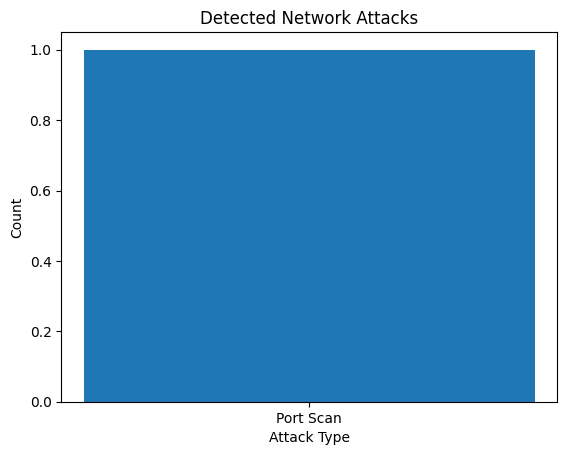

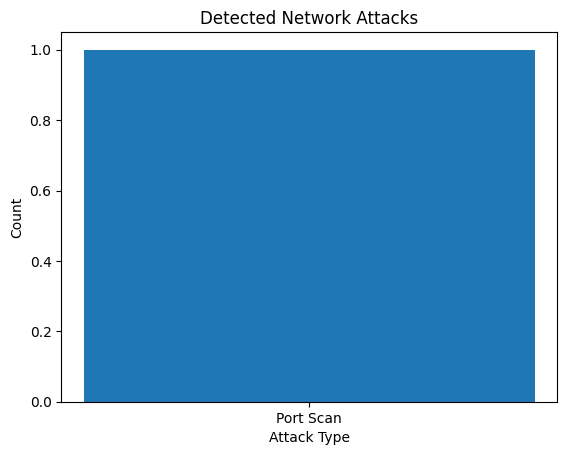

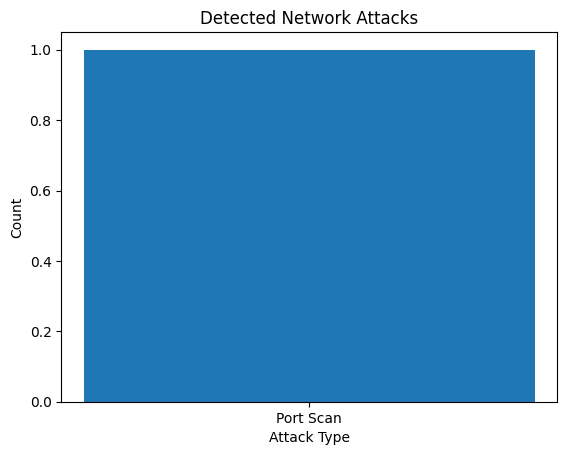

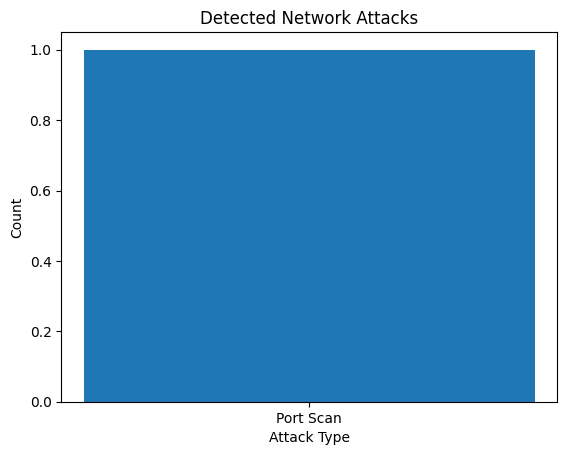

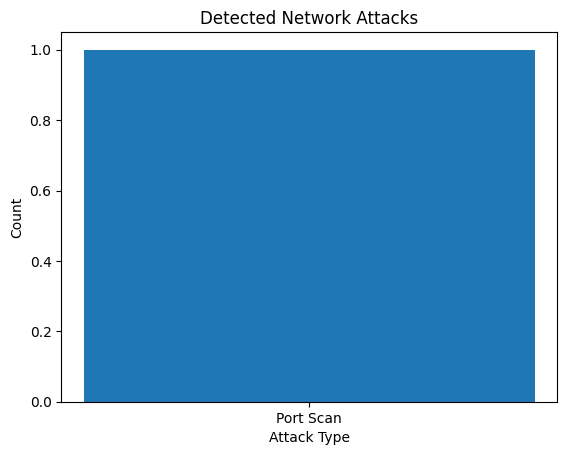

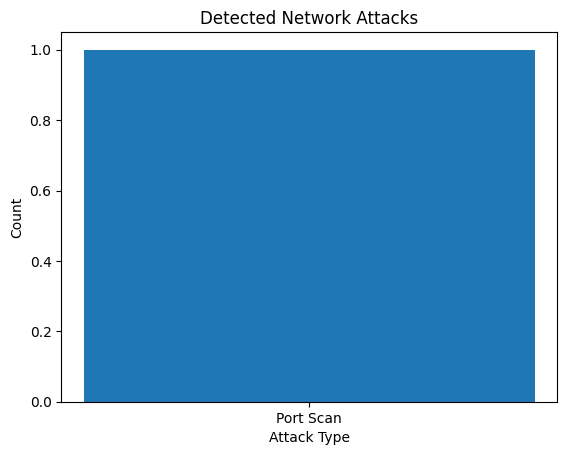

In [ ]:
"""
TASK 4: Network Intrusion Detection System (NIDS)
Language: Python
Tool Used: Scapy (Packet Capture)
Features:
✔ Real-time packet monitoring
✔ Rule-based intrusion detection
✔ Alerts & logging
✔ Auto response (block simulation)
✔ Attack visualization dashboard
"""

from scapy.all import sniff, IP, TCP, UDP, ICMP
import time
import matplotlib.pyplot as plt
from collections import defaultdict
import threading

# ===============================
# CONFIGURATION
# ===============================

PORT_SCAN_THRESHOLD = 10
ICMP_FLOOD_THRESHOLD = 5
LOG_FILE = "ids_alerts.log"

# ===============================
# DATA STRUCTURES
# ===============================

ip_packet_count = defaultdict(int)
port_scan_tracker = defaultdict(set)
blocked_ips = set()
attack_counts = defaultdict(int)

# ===============================
# ALERT SYSTEM
# ===============================

def log_alert(message):
    print(f"[ALERT] {message}")
    with open(LOG_FILE, "a") as f:
        f.write(f"{time.ctime()} - {message}\n")

# ===============================
# RESPONSE MECHANISM
# ===============================

def block_ip(ip):
    if ip not in blocked_ips:
        blocked_ips.add(ip)
        log_alert(f"IP BLOCKED (Simulated): {ip}")

# ===============================
# DETECTION RULES
# ===============================

def detect_intrusion(packet):
    if packet.haslayer(IP):
        src_ip = packet[IP].src

        # Ignore blocked IPs
        if src_ip in blocked_ips:
            return

        # Count packets per IP
        ip_packet_count[src_ip] += 1

        # ICMP Flood Detection
        if packet.haslayer(ICMP):
            if ip_packet_count[src_ip] > ICMP_FLOOD_THRESHOLD:
                attack_counts["ICMP Flood"] += 1
                log_alert(f"ICMP Flood detected from {src_ip}")
                block_ip(src_ip)

        # Port Scan Detection
        if packet.haslayer(TCP):
            dst_port = packet[TCP].dport
            port_scan_tracker[src_ip].add(dst_port)

            if len(port_scan_tracker[src_ip]) > PORT_SCAN_THRESHOLD:
                attack_counts["Port Scan"] += 1
                log_alert(f"Port Scan detected from {src_ip}")
                block_ip(src_ip)

        # Suspicious Port Detection
        suspicious_ports = [23, 445, 3389]
        if packet.haslayer(TCP) and packet[TCP].dport in suspicious_ports:
            attack_counts["Suspicious Port Access"] += 1
            log_alert(f"Suspicious Port Access from {src_ip} to port {packet[TCP].dport}")

# ===============================
# PACKET MONITORING
# ===============================

def start_sniffing():
    print("Starting Network Intrusion Detection System...")
    sniff(prn=detect_intrusion, store=False)

# ===============================
# DASHBOARD VISUALIZATION
# ===============================

def dashboard():
    plt.ion()
    while True:
        plt.clf()
        attacks = list(attack_counts.keys())
        counts = list(attack_counts.values())

        if attacks:
            plt.bar(attacks, counts)
            plt.title("Detected Network Attacks")
            plt.xlabel("Attack Type")
            plt.ylabel("Count")
            plt.pause(2)

        time.sleep(2)

# ===============================
# MAIN EXECUTION
# ===============================

if __name__ == "__main__":
    sniff_thread = threading.Thread(target=start_sniffing)
    sniff_thread.daemon = True
    sniff_thread.start()

    dashboard()
